In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Derivative of the sigmoid 
def der_sigmoid(x):
    return sigmoid(x) * sigmoid(1 - x)

In [3]:
# ReLU
def relu(x):
    return np.maximum(0, x)

# Derivative of the relu 
def der_relu(x):
    return 1.0*(x>0)

In [4]:
# Training data
input_data = np.arange(-1, 1.1, 0.1).reshape(21,1)
output_data = np.array([-0.96,-0.577,-0.073,0.377,0.641,0.66,0.461,0.134,-0.201,-0.434,-0.5,-0.393,-0.165,0.099,0.307,0.396,0.345,0.182,-0.031,-0.219,-0.321]).reshape(21,1)

In [5]:
#input_data, 
len(input_data), len(output_data)

(21, 21)

In [6]:
input_data[0:5], output_data[0:5]

(array([[-1. ],
        [-0.9],
        [-0.8],
        [-0.7],
        [-0.6]]),
 array([[-0.96 ],
        [-0.577],
        [-0.073],
        [ 0.377],
        [ 0.641]]))

In [14]:
# Initialize weights and biases randomly
## set hidden layer contains 8 neurons
hidden_size = 32
w1 = np.random.rand(1, hidden_size)
b1 = np.random.rand(1, hidden_size)
w2 = np.random.rand(hidden_size, 1)
b2 = np.random.rand(1, 1)

# Training the neural network
lr = 0.05  # learning rate
errors_list = []
output_list = []
epochs = 1000   

for i in range(epochs):
    # Forward propagation
    hidden = sigmoid(np.dot(input_data, w1) + b1)
    outputs = sigmoid(np.dot(hidden, w2) + b2)
    #outputs = np.dot(hidden, w2) + b2

    # Backpropagation
    #mse
    error = 0.5*(output_data-outputs)**2
    errors_list.append(np.mean(error))
    
    ## derivative
    de = outputs-output_data
    d_output = de * der_sigmoid(outputs)
    d_hidden = np.dot(d_output, w2.T) * der_sigmoid(hidden)
    #d_hidden = np.dot(d_output, w2.T)
    
    w2 -= lr * np.dot(hidden.T, d_output)
    b2 -= lr * np.sum(d_output, axis=0, keepdims=True)
    
    w1 -= lr * np.dot(input_data.T, d_hidden)
    b1 -= lr * np.sum(d_hidden, axis=0, keepdims=True)
    
    if i+1 in [3, 10, 100, 200, 400, 1000]:
        output_list.append(outputs.copy())

Text(0, 0.5, 'Training Error')

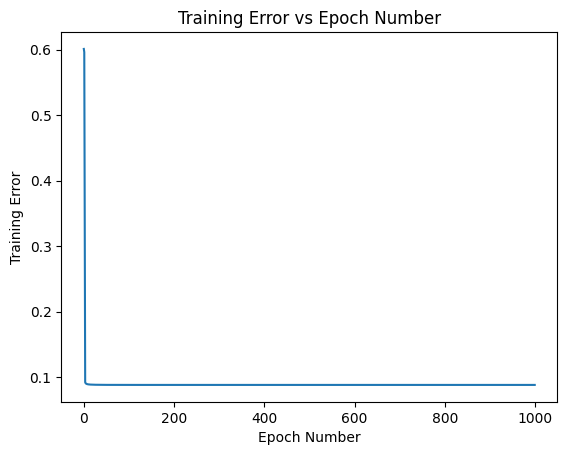

In [15]:
## Plot training error vs epoch number
plt.figure()
plt.plot(range(epochs), errors_list)
plt.title('Training Error vs Epoch Number')
plt.xlabel('Epoch Number')
plt.ylabel('Training Error')

In [11]:
# errors_list

In [12]:
## Plot decision boundary and data points
def plot_compare(epoch, x, target, predicted):
    plt.figure()
    plt.scatter(x, target, c='C0', label="target")
    plt.scatter(x, predicted, c='C1', label="predicted")
    plt.title(f'f(x) vs x && output vs x after {epoch} epochs')
    plt.legend()
    plt.show()

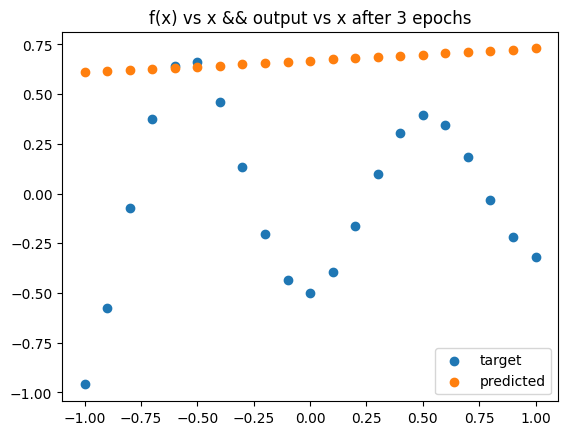

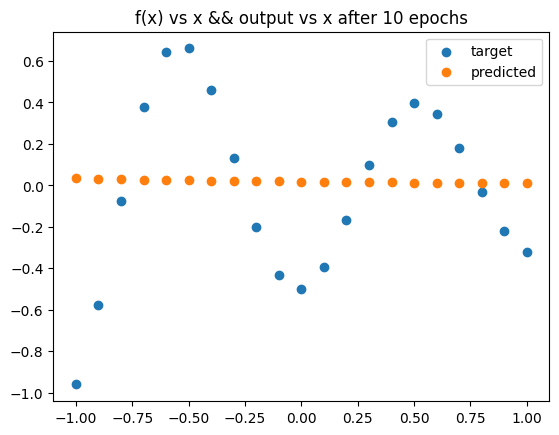

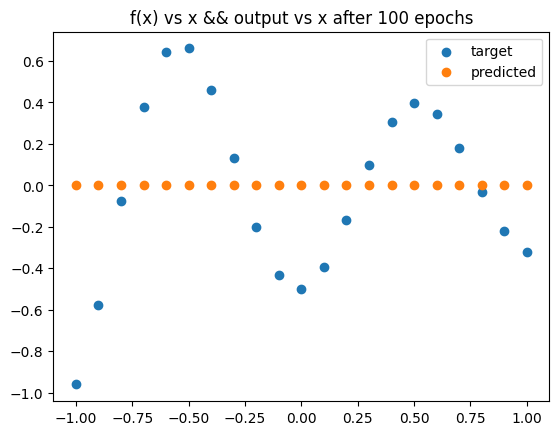

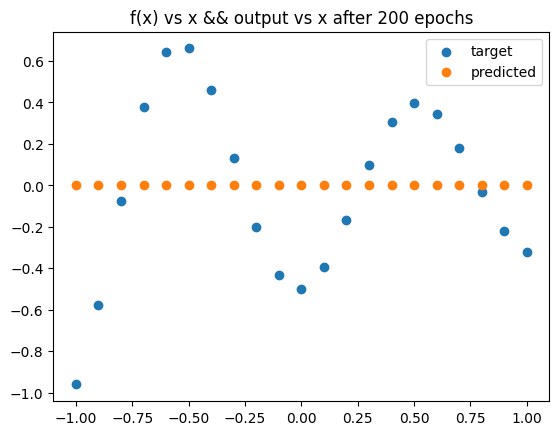

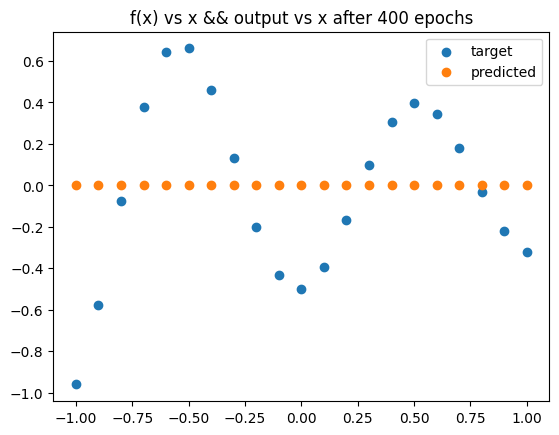

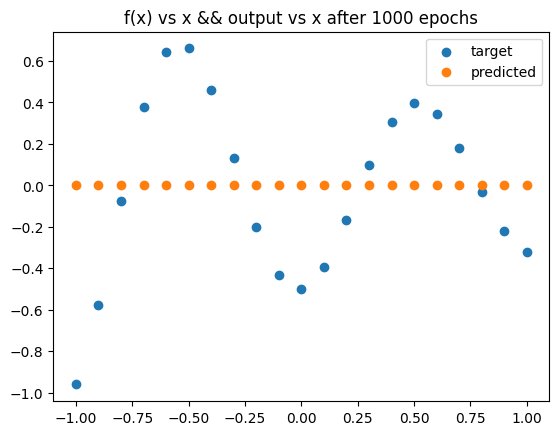

In [16]:
plot_compare('3', input_data, output_data, output_list[0])
plot_compare('10', input_data, output_data, output_list[1])
plot_compare('100',input_data, output_data, output_list[2])
plot_compare('200', input_data, output_data, output_list[3])
plot_compare('400', input_data, output_data, output_list[4])
plot_compare('1000', input_data, output_data, output_list[5])

In [13]:
# output_data

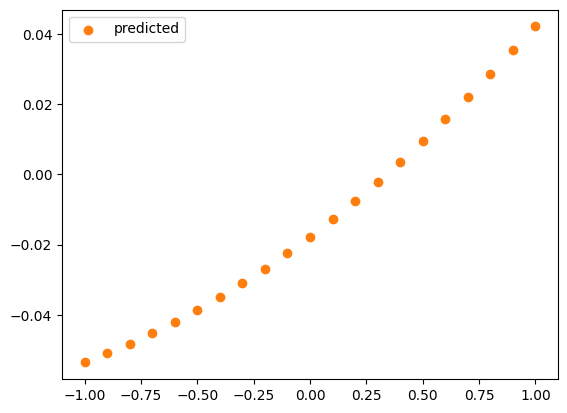

In [23]:
plt.figure()
plt.scatter(input_data, output_list[2], c='C1', label="predicted")
plt.legend()
plt.show()

In [37]:
np.sum((output_list[0] + output_data)**2)/len(output_data)

1.0637662294712409